In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
all_variables = ['actualInteractionsPerCrossing',
'averageInteractionsPerCrossing',
'correctedActualMu',
'correctedAverageMu',
'correctedScaledActualMu',
'correctedScaledAverageMu',
'NvtxReco',
'p_nTracks',
'p_pt_track',
'p_eta',
'p_phi',
'p_charge',
'p_qOverP',
'p_z0',
'p_d0',
'p_sigmad0',
'p_d0Sig',
'p_EptRatio',
'p_dPOverP',
'p_z0theta',
'p_etaCluster',
'p_phiCluster',
'p_eCluster',
'p_rawEtaCluster',
'p_rawPhiCluster',
'p_rawECluster',
'p_eClusterLr0',
'p_eClusterLr1',
'p_eClusterLr2',
'p_eClusterLr3',
'p_etaClusterLr1',
'p_etaClusterLr2',
'p_phiClusterLr2',
'p_eAccCluster',
'p_f0Cluster',
'p_etaCalo',
'p_phiCalo',
'p_eTileGap3Cluster',
'p_cellIndexCluster',
'p_phiModCalo',
'p_etaModCalo',
'p_dPhiTH3',
'p_R12',
'p_fTG3',
'p_weta2',
'p_Reta',
'p_Rphi',
'p_Eratio',
'p_f1',
'p_f3',
'p_Rhad',
'p_Rhad1',
'p_deltaEta1',
'p_deltaPhiRescaled2',
'p_TRTPID',
'p_TRTTrackOccupancy',
'p_numberOfInnermostPixelHits',
'p_numberOfPixelHits',
'p_numberOfSCTHits',
'p_numberOfTRTHits',
'p_numberOfTRTXenonHits',
'p_chi2',
'p_ndof',
'p_SharedMuonTrack',
'p_E7x7_Lr2',
'p_E7x7_Lr3',
'p_E_Lr0_HiG',
'p_E_Lr0_LowG',
'p_E_Lr0_MedG',
'p_E_Lr1_HiG',
'p_E_Lr1_LowG',
'p_E_Lr1_MedG',
'p_E_Lr2_HiG',
'p_E_Lr2_LowG',
'p_E_Lr2_MedG',
'p_E_Lr3_HiG',
'p_E_Lr3_LowG',
'p_E_Lr3_MedG',
'p_ambiguityType',
'p_asy1',
'p_author',
'p_barys1',
'p_core57cellsEnergyCorrection',
'p_deltaEta0',
'p_deltaEta2',
'p_deltaEta3',
'p_deltaPhi0',
'p_deltaPhi1',
'p_deltaPhi2',
'p_deltaPhi3',
'p_deltaPhiFromLastMeasurement',
'p_deltaPhiRescaled0',
'p_deltaPhiRescaled1',
'p_deltaPhiRescaled3',
'p_e1152',
'p_e132',
'p_e235',
'p_e255',
'p_e2ts1',
'p_ecore',
'p_emins1',
'p_etconeCorrBitset',
'p_ethad',
'p_ethad1',
'p_f1core',
'p_f3core',
'p_maxEcell_energy',
'p_maxEcell_gain',
'p_maxEcell_time',
'p_maxEcell_x',
'p_maxEcell_y',
'p_maxEcell_z',
'p_nCells_Lr0_HiG',
'p_nCells_Lr0_LowG',
'p_nCells_Lr0_MedG',
'p_nCells_Lr1_HiG',
'p_nCells_Lr1_LowG',
'p_nCells_Lr1_MedG',
'p_nCells_Lr2_HiG',
'p_nCells_Lr2_LowG',
'p_nCells_Lr2_MedG',
'p_nCells_Lr3_HiG',
'p_nCells_Lr3_LowG',
'p_nCells_Lr3_MedG',
'p_pos',
'p_pos7',
'p_poscs1',
'p_poscs2',
'p_ptconeCorrBitset',
'p_ptconecoreTrackPtrCorrection',
'p_r33over37allcalo',
'p_topoetconeCorrBitset',
'p_topoetconecoreConeEnergyCorrection',
'p_topoetconecoreConeSCEnergyCorrection',
'p_weta1',
'p_widths1',
'p_widths2',
'p_wtots1',
'p_e233',
'p_e237',
'p_e277',
'p_e2tsts1',
'p_ehad1',
'p_emaxs1',
'p_fracs1',
'p_DeltaE',
'p_E3x5_Lr0',
'p_E3x5_Lr1',
'p_E3x5_Lr2',
'p_E3x5_Lr3',
'p_E5x7_Lr0',
'p_E5x7_Lr1',
'p_E5x7_Lr2',
'p_E5x7_Lr3',
'p_E7x11_Lr0',
'p_E7x11_Lr1',
'p_E7x11_Lr2',
'p_E7x11_Lr3',
'p_E7x7_Lr0',
'p_E7x7_Lr1']

In [ ]:
# Reading training set
import h5py
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

import numpy as np

f = h5py.File('/content/drive/MyDrive/train.h5', 'r')

train = pd.DataFrame(f['train'][:], dtype=np.float64)
print (f'Shape of training data set: {train.shape}')

XTrain = train[all_variables]
yTrain = train['Truth']

print (f'Shape of XTrain: {XTrain.shape}')
print (f'Shape of yTrain: {yTrain.shape}')

Shape of training data set: (162500, 166)
Shape of XTrain: (162500, 160)
Shape of yTrain: (162500,)


In [ ]:
# Reading test set
import h5py
f = h5py.File('/content/drive/MyDrive/test.h5', 'r')

test = pd.DataFrame(f['test'][:], dtype=np.float64)
print (f'Shape of test data set: {test.shape}')

Shape of test data set: (160651, 164)


In [ ]:
# Classification
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot
from sklearn.feature_selection import RFE

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=20)
SKB = SelectKBest(f_classif, k=20).fit(XTrain, yTrain)

fit = rfe.fit(XTrain, yTrain)
BestRFE = fit.get_feature_names_out()

BestClassFeatures = SKB.get_feature_names_out()
print(BestClassFeatures)



/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 67  73  76 101 113 119 122 128 131 136] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


KeyboardInterrupt: ignored

In [ ]:
print(BestRFE)

['p_rawECluster' 'p_eClusterLr2' 'p_E7x7_Lr3' 'p_e1152' 'p_e132' 'p_e255'
 'p_e2ts1' 'p_emins1' 'p_ethad' 'p_ethad1'
 'p_topoetconecoreConeSCEnergyCorrection' 'p_e233' 'p_e237' 'p_E3x5_Lr0'
 'p_E3x5_Lr1' 'p_E5x7_Lr3' 'p_E7x11_Lr0' 'p_E7x11_Lr1' 'p_E7x11_Lr3'
 'p_E7x7_Lr0']


In [ ]:
XTrainClass = SKB.fit_transform(XTrain, yTrain)
XTestClass = np.array(test[BestRFE.tolist()])
XTestClass.shape

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 67  73  76 101 113 119 122 128 131 136] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


NameError: ignored

In [ ]:
np.set_printoptions(suppress=True)
from sklearn.metrics import log_loss
def ClassificationAlgo(model, X, y, test, score_func, name):
  cv = KFold(n_splits=5, shuffle=False)
  scores = cross_val_score(model, X, y, scoring=score_func,
                         cv=cv, n_jobs=-1)
  print("Scores: ", scores)
  X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
      X, y, test_size=0.20, random_state=0)

  model.fit(X_train_class, y_train_class)
  tempPreds = model.predict_proba(X_test_class)
  print(tempPreds)
  print(log_loss(y_test_class, tempPreds))
  model.fit(X, y)
  preds = model.predict_proba(test)[:,None]
  print(preds)
  newCol = np.arange(160651, dtype=int)[:,None]
  print(newCol.shape)
  CSVArray = np.concatenate([newCol, preds], axis=1)
  np.savetxt(name,
             CSVArray, delimiter=",", fmt='%f')


In [ ]:
ClassificationAlgo(LogisticRegression(), XTrainClass, yTrain, XTestClass, 'neg_log_loss', 'Classification_MagnusDiamant_SKLearnLinearRegression.txt' )

Scores:  [-0.34493633 -0.47661977 -0.46783313 -0.38493488 -0.29171527]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[[0.99980104 0.00019896]
 [1.         0.        ]
 [0.05318646 0.94681354]
 ...
 [0.78735238 0.21264762]
 [0.04082971 0.95917029]
 [0.09482487 0.90517513]]
0.32902436556391834
[[[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 ...

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]]
(160651, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


ValueError: ignored

In [ ]:
ClassificationAlgo(RandomForestClassifier( criterion='log_loss'), XTrainClass, yTrain, XTestClass, 'neg_log_loss', 'Classification_MagnusDiamant_SKLearnDecisionTree.txt' )

Scores:  [-0.27458461 -0.27932627 -0.27253181 -0.27790254 -0.26945949]
[0. 0. 1. ... 0. 1. 1.]
(32500,)
2.9066328992369925


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
param = {'max_depth':5, 'eta':1, 'objective':'binary:logistic' }
data_dmatrix = xgb.DMatrix(data=XTrainClass,label=yTrain)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

ClassificationAlgo(xg_reg, XTrainClass, yTrain, XTestClass, 'neg_log_loss', 'Classification_MagnusDiamant_XGBoost.txt' )


Scores:  [nan nan nan nan nan]
[0.43406323 0.18200576 0.7515363  ... 0.33560628 0.78384185 0.7608789 ]
(32500,)
0.35858584085748746


ValueError: ignored

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from collections import defaultdict
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

class PFA(object):
    def __init__(self, n_features, q=None):
        self.q = q
        self.n_features = n_features

    def fit(self, X):
        if not self.q:
            self.q = X.shape[1]

        sc = StandardScaler()
        X = sc.fit_transform(X)

        pca = PCA(n_components=self.q).fit(X) # calculation Covmatrix is embeded in PCA
        A_q = pca.components_.T

        kmeans = KMeans(n_clusters=self.n_features).fit(A_q)
        clusters = kmeans.predict(A_q)
        cluster_centers = kmeans.cluster_centers_

        dists = defaultdict(list)
        for i, c in enumerate(clusters):
            dist = euclidean_distances([A_q[i, :]], [cluster_centers[c, :]])[0][0]
            dists[c].append((i, dist))

        self.indices_ = [sorted(f, key=lambda x: x[1])[0][0] for f in dists.values()]
        self.features_ = X[:, self.indices_]

# Usage
pfa = PFA(n_features=8)
pfa.fit(test)
# To get the transformed matrix
x = pfa.features_
print(x)
# To get the column indices of the kept features
column_indices = pfa.indices_
column_features = pfa.features_




[[-0.4083984   0.43314567  0.65252703 ... -0.54459177 -0.2232172
   0.        ]
 [-1.56120329 -1.5260939  -0.59865228 ... -1.92867788 -0.51272966
   0.        ]
 [-1.56120329  0.28607449 -2.16262642 ... -0.05334626 -0.37414421
   0.        ]
 ...
 [-0.903641   -0.45295714 -1.69343418 ... -1.64293447  0.01686428
   0.        ]
 [-1.03502194 -0.51642599  0.80892445 ... -0.48709233 -0.2740352
   0.        ]
 [ 1.26203848 -0.50171112  0.02693738 ...  0.83857594 -0.16209283
   0.        ]]


In [ ]:
print(column_indices)

[146, 15, 8, 126, 49, 154, 54, 104]


(160651, 8)


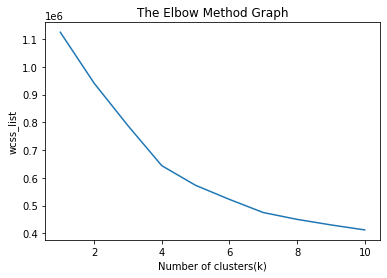

In [ ]:
import matplotlib.pyplot as mtp
testCluster = column_features
print(testCluster.shape)

#finding optimal number of clusters using the elbow method
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 10.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(testCluster)
    wcss_list.append(kmeans.inertia_)
mtp.plot(range(1, 11), wcss_list)
mtp.title('The Elbow Method Graph')
mtp.xlabel('Number of clusters(k)')
mtp.ylabel('wcss_list')
mtp.show()

We see a bend (elbow) at 4 clusters.

In [ ]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 42)
kMeansPreds = kmeans.fit_predict(column_features)
print(kMeansPreds)
print(kMeansPreds.shape)


[1 3 3 ... 3 1 4]
(160651,)


In [ ]:
print(test.columns[column_indices][0])

correctedScaledAverageMu


In [ ]:
with open('/content/drive/MyDrive/Clustering_MagnusDiamant_KMeansClustering.txt', 'w') as file_handler:
    index = 0
    for item in kMeansPreds:
        file_handler.write("{}, {}\n".format(index, item))
        index += 1

with open('/content/drive/MyDrive/Clustering_MagnusDiamant_KMeansClustering_VariableList.txt', 'w') as file_handler:
    index = 0
    for item in (test.columns[column_indices]).tolist():
        file_handler.write("{}\n".format(item))
        index += 1

In [ ]:
preds = kMeansPreds[:,None]
newCol = np.arange(160651, dtype=int)[:,None]
CSVArray = np.concatenate([newCol, preds], axis=1)
np.savetxt("Clustering_MagnusDiamant_KMeans.txt", CSVArray, delimiter=",", fmt='%f')
np.savetxt("Clustering_MagnusDiamant_KMeans_VariableList.txt", (XTrain.iloc[:, column_indices]).columns.values, delimiter=",", fmt='%s')

In [ ]:
affProp = DBSCAN(eps=3, min_samples=3)
affPropPreds = affProp.fit(testCluster)
print(affPropPreds)

DBSCAN()


In [ ]:
with open('/content/drive/MyDrive/Clustering_MagnusDiamant_SKLearnDBSCAN.txt', 'w') as file_handler:
    index = 0
    for item in affPropPreds.labels_:
        file_handler.write("{}, {}\n".format(index, item))
        index += 1

with open('/content/drive/MyDrive/Clustering_MagnusDiamant_SKLearnDBSCAN_VariableList.txt', 'w') as file_handler:
    index = 0
    for item in (test.columns[column_indices]).tolist():
        file_handler.write("{}\n".format(item))
        index += 1